Let $v_0=const$, then
$$
\omega^2v + 2i\omega v_0\frac{dv}{dz} + (1-v_0^2)\frac{d^2v}{dz^2} = 0
$$

If we set Dirichlet boundary conditions $v(-1) = v(1) = 0$, we have

$$
v = \exp\left(-\frac{i\omega}{v_0+1}\right)\left[ \exp\left(i\omega\frac{z+1}{v_0+1}\right) - \exp\left(i\omega\frac{z+1}{v_0-1}\right) \right]
$$
where $\omega = n\pi(1-v_0^2)/2\in\mathbb{R}$

We can also set free right end $v(-1)=0, v'(1) = 0$
$$
v = \exp\left(-\frac{i\omega}{v_0+1}\right)\left[ \exp\left(i\omega\frac{z+1}{v_0+1}\right) - \exp\left(i\omega\frac{z+1}{v_0-1}\right) \right]
$$
with frequency
$$
\omega = (v_0^2-1) \left[ \frac{n\pi}{2} - \frac{1}{4}i\ln\left(\frac{v_0-1}{v_0+1}\right) \right]
$$

For any $v_0\neq 1$, the term $i\ln((v_0-1)/(v_0+1))\in\mathbb{C}$ and its imaginary part is positive. Therefore,

If $v_0<1$, then $\Im(\omega)<0$, it's damped oscillation.

If $v_0>1$, then $\Im(\omega)>0$, it's unstable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from nozzle import Spectral

# set mpl params
import json
with open("mpl_config.json") as fp:
    config: dict = json.load(fp)
    for k,v in config.items():
        plt.rcParams[k] = v

fixed-fixed: mode 1 dE (-1848.6903774768737+1.4294255849489697e-12j)
fixed-fixed: mode 2 dE (-7394.642747625276+1.9707465225736477e-12j)
fixed-fixed: mode 3 dE (-16637.500827681455+9.93176004602486e-12j)
fixed-open: mode 0 dE (-234.24608390884555+304.3795786696795j)
fixed-open: mode 1 dE (-429.7276976077794+996.5468172210217j)
fixed-open: mode 2 dE (-815.9473895474624+1672.36197394794j)


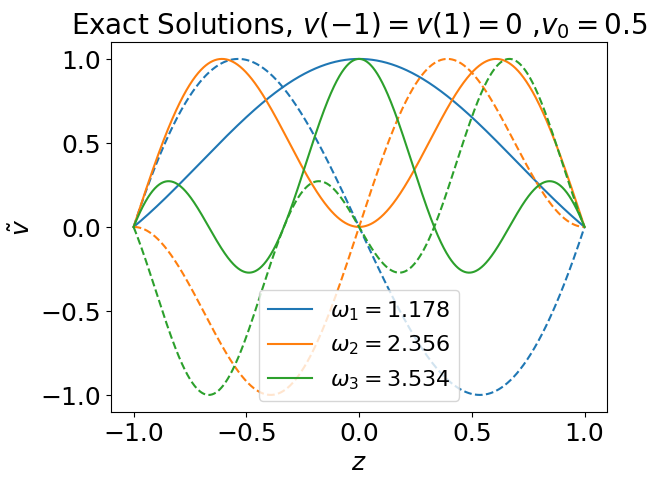

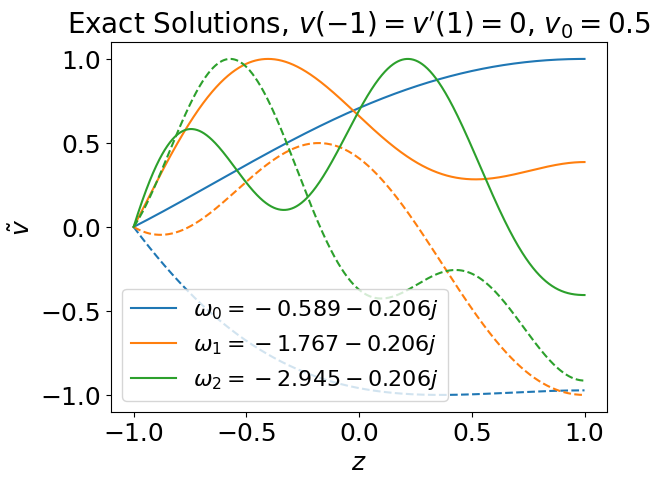

In [30]:
v0 = 0.5
num_funcs = 3
N = 1000
# differentiation matrices
spectral = Spectral(N, "symmetric", "FD")
z = spectral.x
D1 = spectral.D1
D2 = spectral.D2

plt.figure(1)
omega = np.arange(num_funcs+1)*np.pi*np.abs(1-v0**2)/2
z = np.linspace(-1,1,N)
for n in range(1, num_funcs+1):
    v = np.exp(-1j*omega[n]/(v0+1)) * ( np.exp(1j*omega[n]*(z+1)/(v0+1)) - np.exp(1j*omega[n]*(z+1)/(v0-1)))
    if np.abs(v.real).max() != 0: 
        v_real_norm = v.real/np.abs(v.real).max()
    else:
        v_real_norm = v.real
    if np.abs(v.imag).max() != 0: 
        v_imag_norm = v.imag/np.abs(v.imag).max()
    else:
        v_imag_norm = v.imag

    print(f"fixed-fixed: mode {n} dE", -2j*v0*omega[n]*simpson(v.conj()*(D1@v)))
    
    lines = plt.plot(z,v_real_norm,label=f"$\omega_{n}={omega[n]:.3f}$")
    plt.plot(z,v_imag_norm,'--',color=lines[0]._color)
plt.xlabel("$z$")
plt.ylabel("$\\tilde{v}$")
plt.title(f"Exact Solutions, $v(-1)=v(1)=0$ ,$v_0={v0}$")
plt.legend()
    

plt.figure(2)
omega = (v0**2-1)*(2*np.arange(num_funcs)*np.pi - 1j*np.log((v0-1)/(v0+1)+0j))/4
z = np.linspace(-1,1,N)
for n in range(num_funcs):
    v = np.exp(-1j*omega[n]/(v0+1)) * ( np.exp(1j*omega[n]*(z+1)/(v0+1)) - np.exp(1j*omega[n]*(z+1)/(v0-1)))
    if np.abs(v.real).max() != 0: 
        v_real_norm = v.real/np.abs(v.real).max()
    else:
        v_real_norm = v.real
    if np.abs(v.imag).max() != 0: 
        v_imag_norm = v.imag/np.abs(v.imag).max()
    else:
        v_imag_norm = v.imag

    print(f"fixed-open: mode {n} dE", -2j*v0*omega[n]*simpson(v.conj()*(D1@v)))
    
    lines = plt.plot(z,v_real_norm,label=f"$\omega_{n}={omega[n]:.3f}$")
    plt.plot(z,v_imag_norm,'--',color=lines[0]._color)
plt.xlabel("$z$")
plt.ylabel("$\\tilde{v}$")
plt.title(f"Exact Solutions, $v(-1)=v'(1)=0$, $v_0={v0}$")
plt.legend()
